<a href="https://colab.research.google.com/github/HwangHanJae/CP1_Project/blob/main/classification/cooking_time_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글화 작업

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

# 라이브러리 로드

In [ ]:
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 47.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 로드

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/CP1/만개의 레시피.csv',encoding='cp949')
data2 = pd.read_csv('/content/drive/MyDrive/CP1/only_ingredient_list.csv')
crawing_data = pd.read_parquet('/content/drive/MyDrive/CP1/crawling_ingredient.parquet', engine='fastparquet')

data1 =data1.dropna().reset_index(drop=True)
df = pd.concat([data1, data2, crawing_data['ingredient']], axis=1)

In [ ]:
df.head()

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT,only_ingred,ingredient
0,128671,어묵김말이,어묵김말이,skfo0701,꽃날,9592,6,66,튀김,간식,가공식품류,디저트,맛있는 김말이에 쫄깃함을 더한 어묵 김말이예요-,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내,20070402131403,"['어묵', '김밥용김', '당면', '양파', '당근', '깻잎', '튀김가루',...","[[어묵, 2개], [김밥용김, 3장], [당면, 1움큼], [양파, 1/2개], ..."
1,131871,★현미호두죽,현미호두죽,cds1117,햇님&별님,2912,0,9,끓이기,일상,쌀,밥/죽/떡,현미호두죽,[재료] 현미 4컵| 찹쌀 2컵| 호두 50g| 물 1/2컵| 소금 약간,2인분,초급,30분이내,20070410142301,"['현미', '찹쌀', '호두', '물', '소금']","[[현미, 4컵], [찹쌀, 2컵], [호두, 50g], [물, 1/2컵], [소금..."
2,139247,부들부들 보들보들 북어갈비♥,북어갈비,skfo0701,꽃날,6865,3,97,굽기,술안주,건어물류,메인반찬,오늘은 집에서 굴러다니고 쉽게 구할 수 있는 북어로 일품요리를 만들어 보았어요! 도...,[재료] 북어포 1마리| 찹쌀가루 1C [양념] 간장 2T| 설탕 1T| 물 1T|...,2인분,초급,60분이내,20070501000844,"['북어포', '찹쌀가루']","[[북어포, 1마리], [찹쌀가루, 1C], [간장, 2T], [설탕, 1T], [..."
3,149207,토마토스파게티♥,토마토스파게티,skfo0701,꽃날,12754,2,36,볶음,일상,가공식품류,면/만두,한번 만들어 두면 이모저모 쓸 용도가 많은 토마토소스를 이용한 토마토 스파게티.,[재료] 파스타면 [양념] 토마토 1개| 토마토 페이스트 3T| 양파 1/2개| 다...,1인분,초급,30분이내,20070525232601,['파스타면'],"[[파스타면], [토마토, 1개], [토마토 페이스트, 3T], [양파, 1/2개]..."
4,151148,표고버섯탕수,표고버섯탕수,skfo0701,꽃날,16053,2,194,튀김,손님접대,버섯류,메인반찬,탕수육 먹을때 칼로리때문에 걱정하시는 분들!! 이제는 걱걱걱 정하지 마세요~ 칼로리...,[재료] 건표고버섯 9개| 오이 1/2개| 당근 1/2개| 양파 1/2개| 사과 1...,2인분,초급,30분이내,20070530142653,"['건표고버섯', '오이', '당근', '양파', '사과', '그외의', '과일']","[[건표고버섯, 9개], [오이, 1/2개], [당근, 1/2개], [양파, 1/2..."


concat 하기전에 원본데이터에는 중복값이 없습니다.

In [ ]:
df.iloc[:,:-2].duplicated().sum()

0

# 요리시간(CKG_TIME_NM) 예측하기

## 불필요한 컬럼 제거

- RCP_SNO : 레시피 일련번호
- RCP_TTL : 레시피 제목
- CKG_NM : 요리명
- RGTR_ID : 등록자ID
- RGTR_NM : 등록자명
- INQ_CNT : 조회수
- RCMM_CNT : 추천수
- SRAP_CNT : 스크랩수
- CKG_IPDC : 요리소개
- CKG_MTRL_CN : 요리재료 내용
- FIRST_REG_DT : 최초등록일시 
  - season : 계절로 변경

In [ ]:
drop_columns  = ['RCP_SNO','RCP_TTL','CKG_NM','RGTR_ID','RGTR_NM','INQ_CNT','RCMM_CNT','SRAP_CNT','CKG_IPDC','CKG_MTRL_CN']
df = df.drop(drop_columns, axis=1)
df.shape

(114512, 10)

## 학습/테스트 데이터 분리
- 0.7, 0.3

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

train.shape, test.shape

((80158, 10), (34354, 10))

## 타겟데이터(CKG_TIME_NM) 확인

In [ ]:
train['CKG_TIME_NM'].value_counts()

30분이내    32154
15분이내    15562
60분이내    14404
10분이내     8092
2시간이상     3214
90분이내     2777
5분이내      2551
2시간이내     1404
Name: CKG_TIME_NM, dtype: int64

In [ ]:
train['CKG_TIME_NM'].value_counts(normalize=True)

30분이내    0.401133
15분이내    0.194142
60분이내    0.179695
10분이내    0.100951
2시간이상    0.040096
90분이내    0.034644
5분이내     0.031825
2시간이내    0.017515
Name: CKG_TIME_NM, dtype: float64

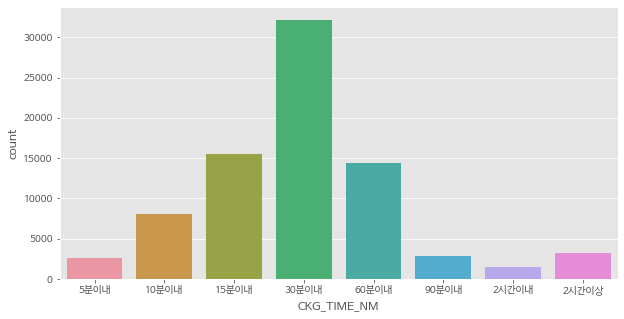

In [ ]:
time_order = ['5분이내', '10분이내', '15분이내','30분이내','60분이내','90분이내','2시간이내', '2시간이상']
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='CKG_TIME_NM', order=time_order)
plt.show()

30분이내의 데이터가 가장 많고 다음은 15분이내 , 60분이내 순으로 되어 있습니다.
정규분포와 흡사한? 모양을 보이고 있습니다.

In [ ]:
train.loc[df['CKG_TIME_NM'].isin(['5분이내','10분이내','15분이내'])]['CKG_TIME_NM'].count()

24377

In [ ]:
train.loc[df['CKG_TIME_NM'].isin(['30분이내'])]['CKG_TIME_NM'].count()

33508

In [ ]:
train.loc[df['CKG_TIME_NM'].isin(['60분이내','90분이내','2시간이내','2시간이상'])]['CKG_TIME_NM'].count()

22273

**아이디어!**    
**(타겟데이터의 카디널리티를 줄이기 위하여!)**

15분 : 5분이내, 10분이내, 15분이내

30분 : 30분이내

60분이상 : 60분이내, 90분이내, 2시간이내, 2시간이상

으로 데이터를 합쳐주는 방법도 존재할 수 있다!

## 요리방법(CKG_MTH_ACTO_NM)

In [ ]:
train['CKG_MTH_ACTO_NM'].value_counts()

끓이기    16135
볶음     15299
굽기     12577
기타      8556
무침      6849
부침      4787
조림      4175
찜       2983
튀김      2942
절임      2333
비빔      1977
삶기      1081
데치기      294
회        170
Name: CKG_MTH_ACTO_NM, dtype: int64

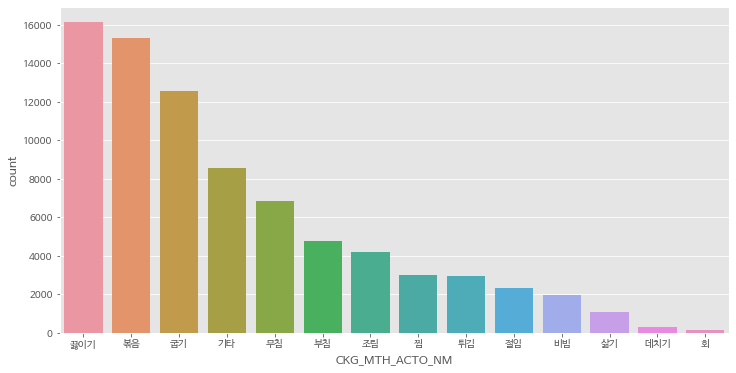

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x='CKG_MTH_ACTO_NM', order=train['CKG_MTH_ACTO_NM'].value_counts().index)
plt.show()

끓이기, 볶음, 굽기 순으로 데이터가 많은 것을 확인할 수 있습니다.

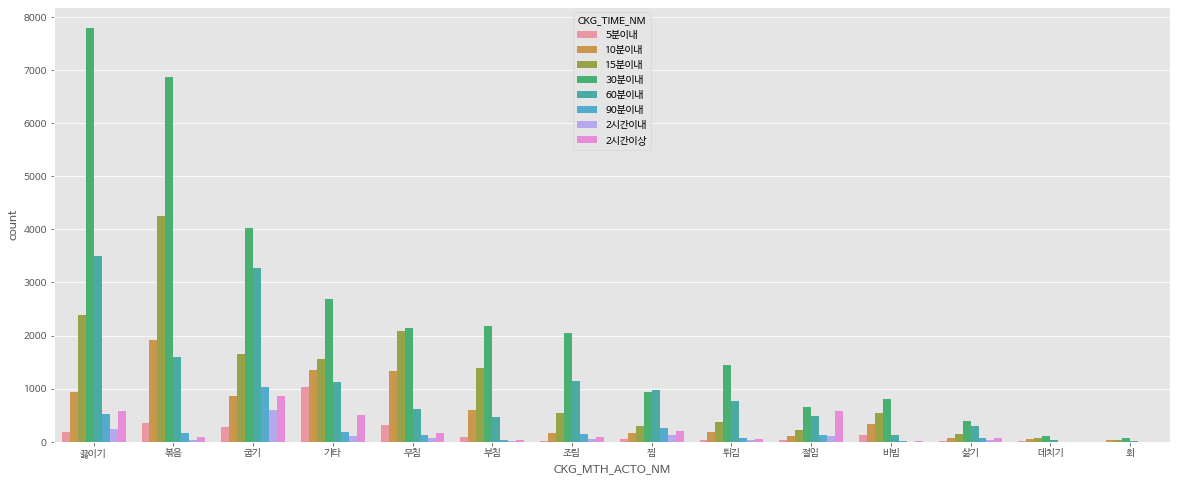

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='CKG_MTH_ACTO_NM',
              hue='CKG_TIME_NM',
              order=train['CKG_MTH_ACTO_NM'].value_counts().index,
              hue_order = time_order)
plt.show() 

요리방법별로 30분이내의 데이터가 가장 많습니다.

무침 방법에서는 30분, 15분의 비율이 비슷하게 보입니다.

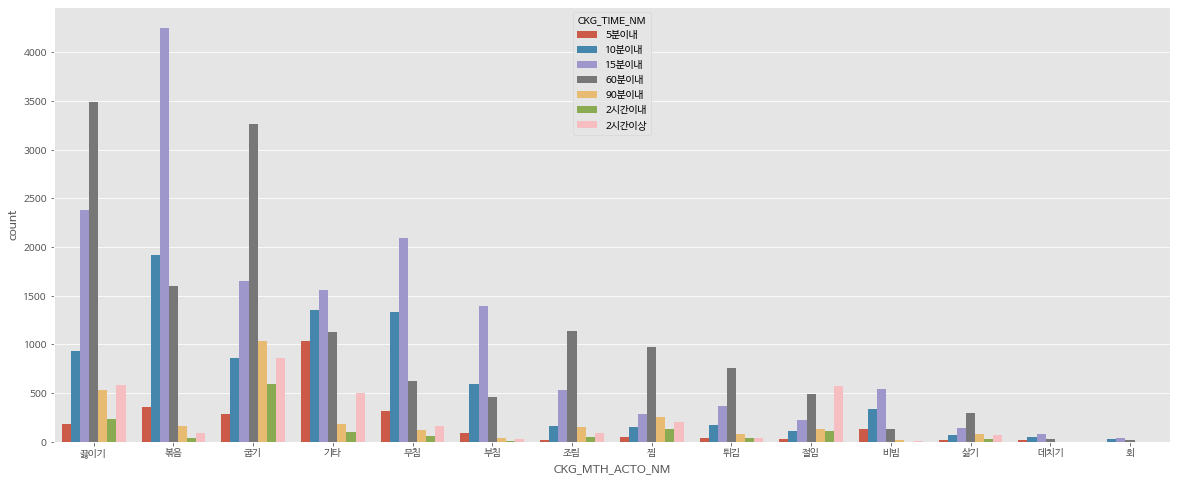

In [ ]:
no30_time_order = ['5분이내', '10분이내', '15분이내','60분이내','90분이내','2시간이내', '2시간이상']
no30_train = train.loc[~train['CKG_TIME_NM'].isin(['30분이내'])]

plt.figure(figsize=(20,8))
sns.countplot(data=no30_train, x='CKG_MTH_ACTO_NM',
              hue='CKG_TIME_NM',
              order=train['CKG_MTH_ACTO_NM'].value_counts().index,
              hue_order = no30_time_order)
plt.show() 

**30분을 제거**하고 확인해보겠습니다.
원래 크기는 **30분->15분->60분** 순서였습니다.

**끓이기** 방법에서는 **60분 -> 15분** 순서로 되어 있습니다.  
**볶음** 방법에서는 **15분 -> 10분** 순서로 되어 있습니다.  
**굽기, 절임** 방법에서는 **2시간이상이 다른 데이터에 비하여 많은 것**을 확인할 수 있습니다.


## 요리상황(CKG_STA_ACTO_NM)

In [ ]:
train['CKG_STA_ACTO_NM'].value_counts()

일상      43461
간식      12613
초스피드     6568
손님접대     4386
영양식      3508
술안주      3123
도시락      1676
다이어트     1367
명절       1191
기타        921
야식        590
해장        420
이유식       334
Name: CKG_STA_ACTO_NM, dtype: int64

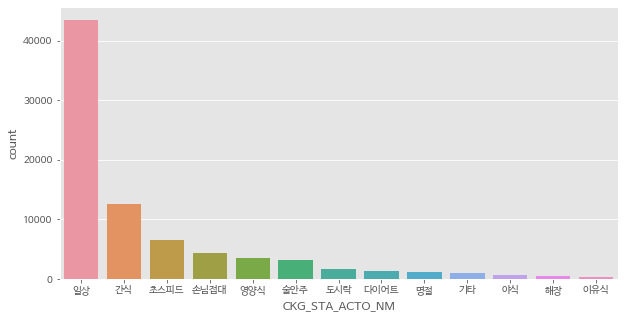

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='CKG_STA_ACTO_NM', order=train['CKG_STA_ACTO_NM'].value_counts().index)
plt.show()

요리상황은 일상이 가장 많은 것으로 확인됩니다.

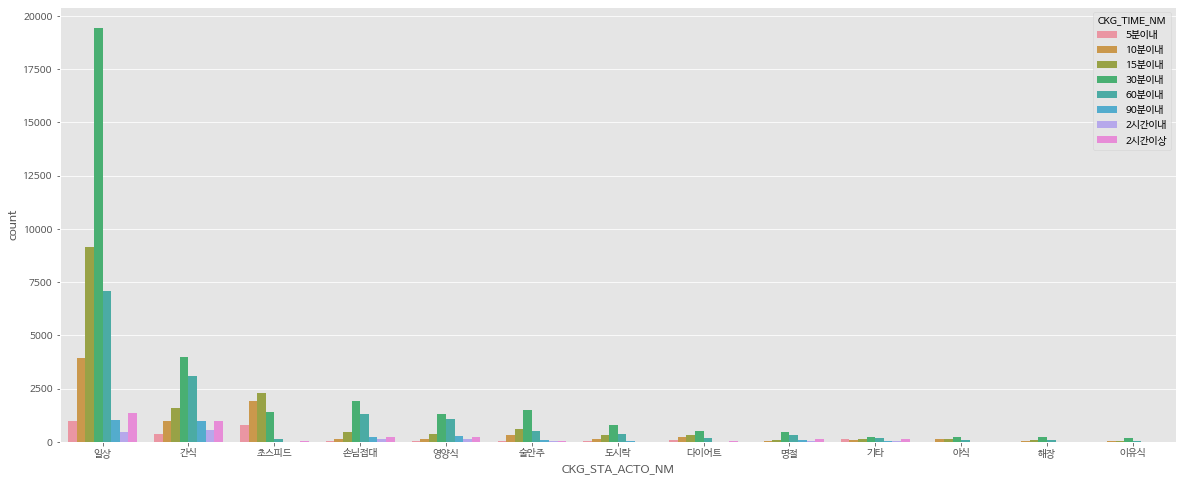

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='CKG_STA_ACTO_NM',
              hue='CKG_TIME_NM',
              order=train['CKG_STA_ACTO_NM'].value_counts().index,
              hue_order = time_order)
plt.show() 


**일상**은 **30분 -> 15분 -> 60분** 순서로 되어있습니다.    
**간식**은 **30분 -> 60분 -> 15분** 순서로 되어 있습니다.  
**초스피드**는 **15분 -> 10분 -> 30분** 순서로 되어 있습니다.


## 요리재료류(CKG_MTRL_ACTO_NM)

In [ ]:
train['CKG_MTRL_ACTO_NM'].value_counts()

채소류       21382
해물류        8802
밀가루        8035
가공식품류      7643
돼지고기       4912
달걀/유제품     4760
소고기        3729
쌀          3476
닭고기        3471
기타         3087
과일류        2716
콩/견과류      2676
건어물류       2351
버섯류        1098
육류         1034
곡류          986
Name: CKG_MTRL_ACTO_NM, dtype: int64

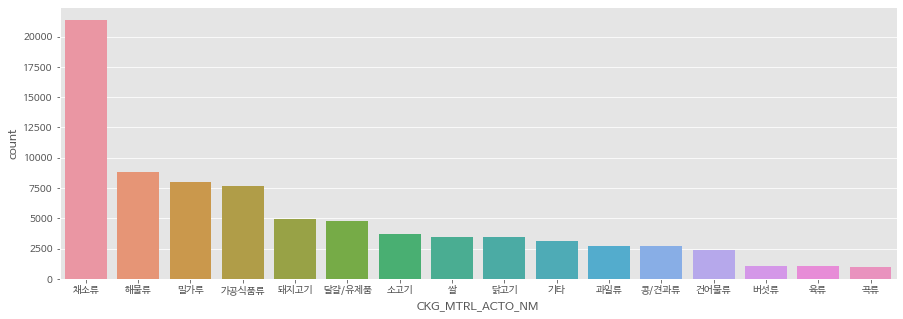

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='CKG_MTRL_ACTO_NM', order=train['CKG_MTRL_ACTO_NM'].value_counts().index)
plt.show()

요리재료는 채소류가 가장 많은 것으로 확인됩니다.

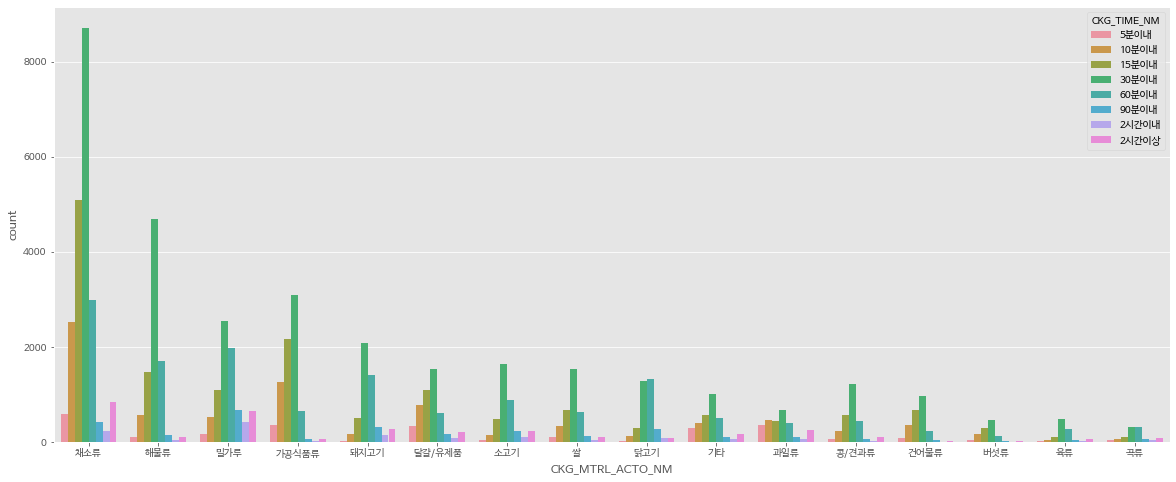

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='CKG_MTRL_ACTO_NM',
              hue='CKG_TIME_NM',
              order=train['CKG_MTRL_ACTO_NM'].value_counts().index,
              hue_order = time_order)
plt.show() 

**채소류**는 **30분 -> 15분 -> 60분** 순으로 되어 있습니다.  
또한 **2시간이상의 데이터가 많습니다. ** 
**해물류**는 **30분 -> 60분 -> 15분** 순으로 되어 있습니다.  
**가공식품류**를 보면 **30분-> 15분 -> 10분** 순으로 되어 있습니다.  
**닭고기**는 **90분->30분** 순으로 되어 있습니다.

## 요리종류(CKG_KND_ACTO_NM)

In [ ]:
train['CKG_KND_ACTO_NM'].value_counts()

밑반찬         16023
메인반찬        12844
밥/죽/떡       10932
빵            7446
국/탕          6753
면/만두         5367
디저트          3923
찌개           2708
김치/젓갈/장류     2498
과자           2170
기타           2045
차/음료/술       1898
양식           1711
샐러드          1683
양념/소스/잼      1358
퓨전            440
스프            359
Name: CKG_KND_ACTO_NM, dtype: int64

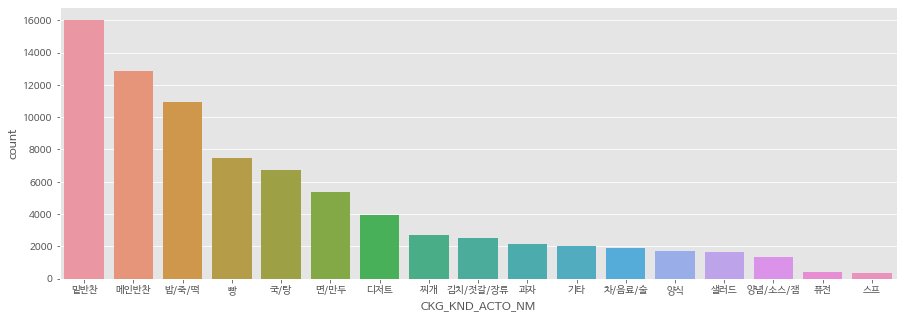

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='CKG_KND_ACTO_NM', order=train['CKG_KND_ACTO_NM'].value_counts().index)
plt.show()

밑반찬, 메인반찬, 밥/죽/떡 순으로 많은 것을 확인할 수 있습니다.

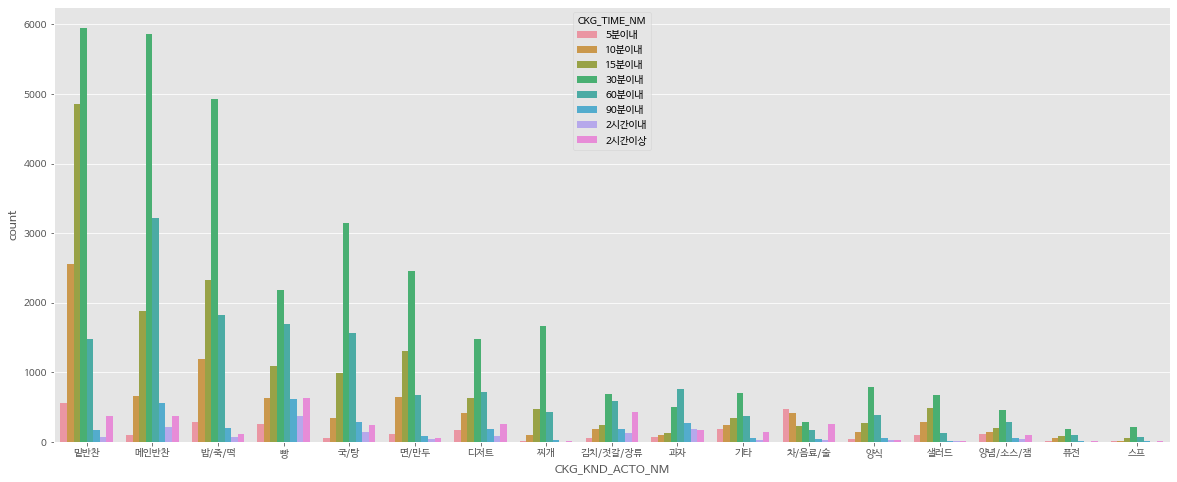

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='CKG_KND_ACTO_NM',
              hue='CKG_TIME_NM',
              order=train['CKG_KND_ACTO_NM'].value_counts().index,
              hue_order = time_order)
plt.show() 

**밑반찬**은 **30분->15분->10분**순으로 되어 있습니다.  
**메인반찬**은 **30분->90분->15분**순으로 되어 있습니다.  
**밥/죽/떡**은 **30분->15분->10분**순으로 되어 있습니다.  
**빵**은 **30분->90분->15분**순으로 되어있고, 2시간이상의 경우가 많습니다.

## 요리인분(CKG_INBUN_NM)

In [ ]:
train['CKG_INBUN_NM'].value_counts()

2인분      29156
4인분      16618
1인분      12186
3인분      10616
6인분이상     9469
5인분       2113
Name: CKG_INBUN_NM, dtype: int64

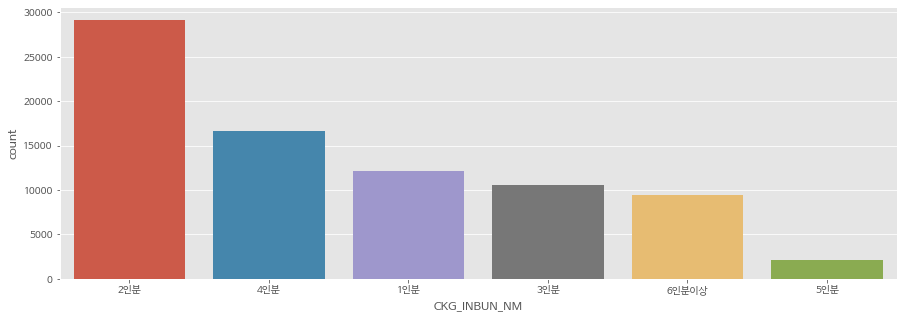

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='CKG_INBUN_NM', order=train['CKG_INBUN_NM'].value_counts().index)
plt.show()

2인분, 4인분, 1인분 순서로 요리가 많습니다.

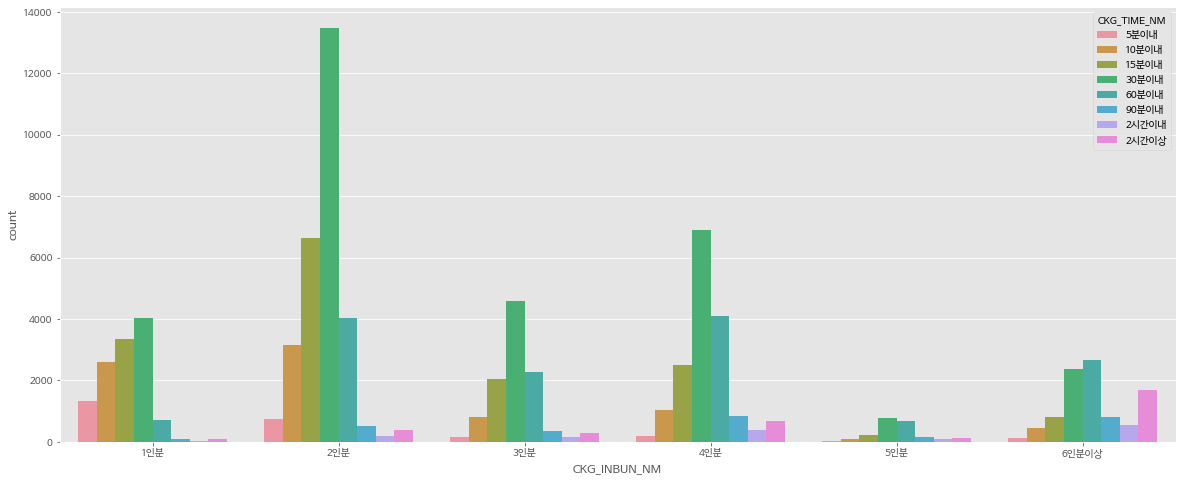

In [ ]:
inbun_order = ['1인분','2인분','3인분','4인분','5인분','6인분이상']
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='CKG_INBUN_NM',
              hue='CKG_TIME_NM',
              order=inbun_order,
              hue_order = time_order)
plt.show() 

**1인분**은 **30분->15분->10분** 순으로 되어 있습니다.  
**2인분**은 **30분->15분->60분** 순으로 되어 있습니다.  
**6인분이상**은 다른데이터와 달리 **2시간이상**이 가장 많습니다

##최초등록일시(FIRST_REG_DT) -> 계절

In [ ]:
def make_season(x):
    x = int(str(x)[4:6])
    if  3 <= x <= 5:
        result = '봄'
    elif 6 <= x <= 8:
        result = '여름'
    elif 9 <= x <= 11:
      result = '가을'
    else:
      result = '겨울'
    return result

train['season'] = train['FIRST_REG_DT'].apply(make_season)
test['season'] = test['FIRST_REG_DT'].apply(make_season)
train = train.drop('FIRST_REG_DT', axis=1)
test = test.drop('FIRST_REG_DT', axis=1)

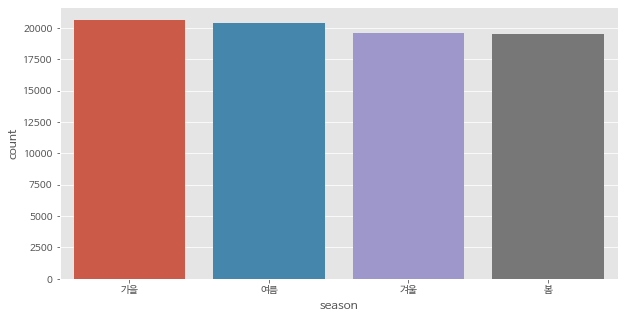

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='season', order=train['season'].value_counts().index)
plt.show()

계절의 등록된 수는 차이가 없어보입니다.

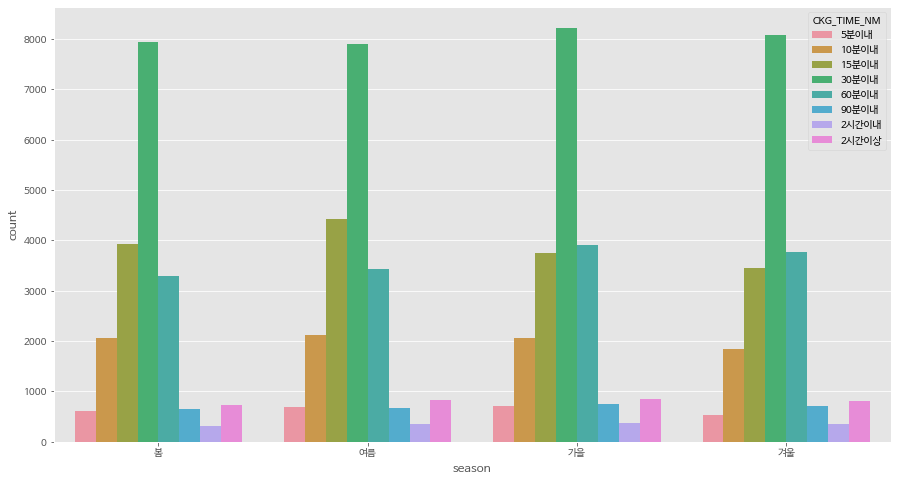

In [ ]:
season_order = ['봄','여름','가을','겨울']
plt.figure(figsize=(15,8))
sns.countplot(data=train, x='season',
              hue='CKG_TIME_NM',
              order=season_order,
              hue_order = time_order)
plt.show() 

큰 차이는 없어보입니다.

## 재료(only_ingred)수
- 사용한 재료 수를 파악

In [ ]:
def count_only_ingred(x):
  return len(x)

train['count_only_ingred'] = train['only_ingred'].apply(count_only_ingred)
test['count_only_ingred'] = test['only_ingred'].apply(count_only_ingred)

### 재료 수의 분포

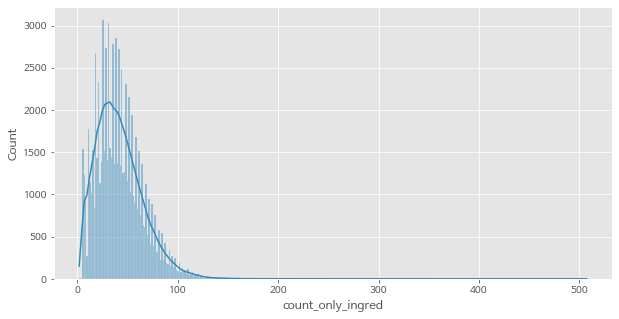

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='count_only_ingred', kde=True)
plt.show()

재료 수의 사분위수를 확인하겠습니다.

In [ ]:
q1 = np.quantile(train['count_only_ingred'], 0.25)
q2 = np.quantile(train['count_only_ingred'], 0.5)
q3 = np.quantile(train['count_only_ingred'], 0.75)
q4 = np.quantile(train['count_only_ingred'], 1)
iqr = q3-q1

print('Q1 : ',q1)
print('Q2 : ',q2)
print('Q3 : ',q3)
print('Q4 : ',q4)
print('IQR : ', iqr)

Q1 :  25.0
Q2 :  39.0
Q3 :  56.0
Q4 :  507
IQR :  31.0


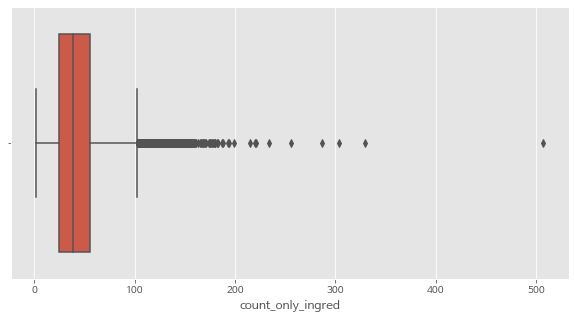

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='count_only_ingred')
plt.show()

약 100개 정도 이상인 데이터는 어떤것이 있는지 확인하겠습니다.

In [ ]:
train.loc[train['count_only_ingred'] < 100]['CKG_TIME_NM'].value_counts()

30분이내    668
60분이내    460
15분이내    104
2시간이상     91
90분이내     84
2시간이내     55
10분이내     22
5분이내       1
Name: CKG_TIME_NM, dtype: int64

재료의 수를 사용할 수 있을지..

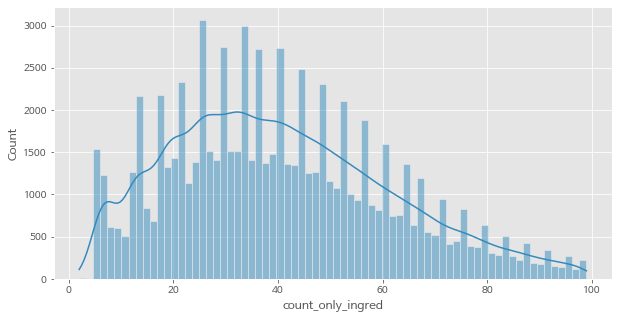

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train.loc[train['count_only_ingred'] < 100], x='count_only_ingred', kde=True)
plt.show()

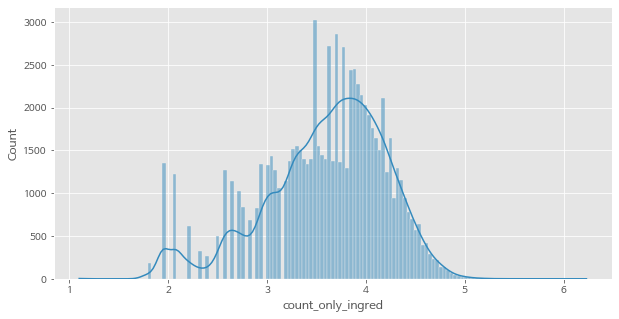

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=np.log1p(train['count_only_ingred']), kde=True)
plt.show()

원래 데이터를 로그화 시켜준 것이 더 정규분포에 가까워 보입니다.

아직도 재료의 수를 사용할지는 의문입니다.

# 간단한 모델링(재료의 수 제외)

In [ ]:
columns = ['only_ingred','ingredient','count_only_ingred','CKG_TIME_NM']

X_train = train.drop(columns, axis=1)
y_train = train['CKG_TIME_NM']
X_test = test.drop(columns, axis=1) 
y_test =test['CKG_TIME_NM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80158, 7) (80158,)
(34354, 7) (34354,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in X_train.columns:
  encoder = LabelEncoder()
  X_train[column] =  encoder.fit_transform(X_train[column])
  X_test[column] = encoder.transform(X_test[column])


X_train.head()

,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_INBUN_NM,CKG_DODF_NM,season
0,1,10,11,8,1,2,2
1,5,10,0,5,2,2,1
2,0,0,8,0,5,4,0
3,0,10,12,13,1,4,3
4,4,10,13,3,5,4,2


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
#basemodel = 0.40
from sklearn.metrics import classification_report
y_true =y_test
y_pred =pred
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       10분이내       0.28      0.21      0.24      3379
       15분이내       0.34      0.30      0.32      6726
       2시간이내       0.09      0.02      0.04       608
       2시간이상       0.34      0.24      0.28      1431
       30분이내       0.50      0.64      0.56     13703
        5분이내       0.35      0.22      0.27      1127
       60분이내       0.37      0.35      0.36      6134
       90분이내       0.14      0.06      0.08      1246

    accuracy                           0.42     34354
   macro avg       0.30      0.26      0.27     34354
weighted avg       0.39      0.42      0.40     34354



In [ ]:
light = LGBMClassifier()
light.fit(X_train, y_train)
pred = light.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_true =y_test
y_pred =pred
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       10분이내       0.36      0.18      0.24      3379
       15분이내       0.40      0.23      0.29      6726
       2시간이내       0.15      0.00      0.01       608
       2시간이상       0.42      0.23      0.29      1431
       30분이내       0.50      0.82      0.62     13703
        5분이내       0.49      0.24      0.32      1127
       60분이내       0.41      0.34      0.37      6134
       90분이내       0.33      0.00      0.00      1246

    accuracy                           0.47     34354
   macro avg       0.38      0.25      0.27     34354
weighted avg       0.43      0.47      0.42     34354



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_true =y_test
y_pred =pred
print(classification_report(y_true, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       10분이내       0.36      0.12      0.18      3379
       15분이내       0.39      0.16      0.23      6726
       2시간이내       0.00      0.00      0.00       608
       2시간이상       0.42      0.16      0.23      1431
       30분이내       0.48      0.87      0.62     13703
        5분이내       0.52      0.17      0.25      1127
       60분이내       0.41      0.29      0.34      6134
       90분이내       0.00      0.00      0.00      1246

    accuracy                           0.46     34354
   macro avg       0.32      0.22      0.23     34354
weighted avg       0.41      0.46      0.39     34354



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


간단한 모델링 결과 베이스모델(0.40)보다는 높게 나온다.
- 데이터 불균형으로 인하여 오버샘플링 고려
- 다양한 컬럼 사용(시간별로 높은 빈도의 재료, 재료의 수,...)
- 다양한 인코더 사용(Target, Catboost)